In [41]:
import pandas as pd
import seaborn as sns
import numpy as np


def remove_outliers(col_name):
    sorted(col_name)
    Q1, Q3 = col_name.quantile([0.25, 0.75])  # 1st and 3rd Quartile
    IQR = Q3 - Q1  # Inter Quartile Range
    lower = Q1 - 1.5 * IQR  # Lower Limit
    upper = Q3 + 1.5 * IQR  # Upper Limit
    return lower, upper  # Returning the Lower and Upper Limit


uploaded_file = r"c:\Users\Raghav\Desktop\bang.csv"
data = pd.read_csv(uploaded_file)


low, high = remove_outliers(data['price'])  # Calling the Function with the column name

# data = data[(data['price'] > low) & (data['price'] < high)]  # Filtering the data
data['price'] = np.where(data['price'] > high, high, data['price']) 

data.to_csv(r"c:\Users\Raghav\Desktop\bang1.csv", index=False)  # Saving the data to a new CSV file


<Axes: ylabel='price'>

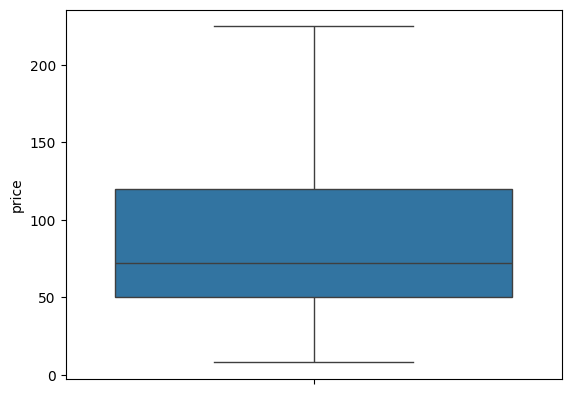

In [ ]:
sns.boxplot(y='price', data=data)  # Boxplot for Potassium Content, after removing the outliers


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import streamlit as st


# Function to remove outliers
def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


# Streamlit App
st.title("Custom Housing Price Predictor")

# Upload dataset
uploaded_file = st.file_uploader("Upload your dataset (CSV file)", type=["csv"])
if uploaded_file:
    # Load dataset
    data = pd.read_csv(uploaded_file)

    # Remove outliers from the price column
    low, high = remove_outliers(data['price'])
    data['price'] = np.where(data['price'] > high, high, data['price'])

    # Display dataset
    st.subheader("Dataset Overview")
    st.write(data.head())

    # Predefined columns
    feature_columns = ["bath", "balcony", "bhk", "price_per_sqft", "new_total_sqft"]
    target_column = "price"
    location_column = "site_location"

    # Feature and target selection
    X = data[feature_columns]
    y = data[target_column]

    # Add location if applicable
    if location_column in data.columns:
        X["Location"] = data[location_column]
        locations = X["Location"].unique()
    else:
        locations = None

    # Test size slider
    test_size = st.sidebar.slider("Test Size", min_value=0.1, max_value=0.5, step=0.05, value=0.2)

    # Random state slider
    random_state = st.sidebar.number_input("Random State", min_value=0, step=1, value=42)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Encode location column if applicable
    if location_column in X.columns:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        location_encoded = encoder.fit_transform(X_train[["Location"]])
        location_encoded_test = encoder.transform(X_test[["Location"]])
        location_columns = encoder.get_feature_names_out(["Location"])
        X_train = pd.concat(
            [X_train.drop(columns=["Location"]).reset_index(drop=True),
             pd.DataFrame(location_encoded, columns=location_columns)], axis=1
             )
        X_test = pd.concat(
            [X_test.drop(columns=["Location"]).reset_index(drop=True),
             pd.DataFrame(location_encoded_test, columns=location_columns)], axis=1
             )

    # Train model
    model = RandomForestRegressor(random_state=random_state, n_estimators=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display metrics
    st.subheader("Model Performance")
    st.write("*Mean Absolute Error (MAE):*", mae)
    st.write("*R² Score:*", r2)

    # Visualization
    st.subheader("Actual vs Predicted Prices")
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(y_test, y_pred, alpha=0.6, label="Predictions")
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")
    ax.set_title("Actual vs Predicted House Prices")
    ax.set_xlabel("Actual Prices")
    ax.set_ylabel("Predicted Prices")
    ax.legend()
    ax.grid()
    st.pyplot(fig)


2024-12-28 09:48:26.369 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 09:48:26.928 
  command:

    streamlit run c:\Users\Raghav\Desktop\Coding\VIT_PFE\housing_prediction\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-28 09:48:26.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 09:48:26.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 09:48:26.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 09:48:26.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 09:48:26.932 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-